# Clustering

In the below notebook, I plot the latitude and longitude of all zip codes in the US to and create clusters to see if the points can generalize well as a summary of the population clusters of the US

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
zip_codes = pd.read_csv("data/zips.csv")

In [3]:
zip_codes.head()

,zip code,state abbreviation,latitude,longitude,city,state
0,35004,AL,33.606379,-86.50249,Moody,Alabama
1,35005,AL,33.592585,-86.95969,Adamsville,Alabama
2,35006,AL,33.451714,-87.23957,Adger,Alabama
3,35007,AL,33.232422,-86.80871,Alabaster,Alabama
4,35010,AL,32.903432,-85.92669,Alexander City,Alabama


In [4]:
len(zip_codes)

33178

In [5]:
zip_codes.dtypes

zip code               object
state abbreviation     object
latitude              float64
longitude             float64
city                   object
state                  object
dtype: object

C:\Users\Jim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


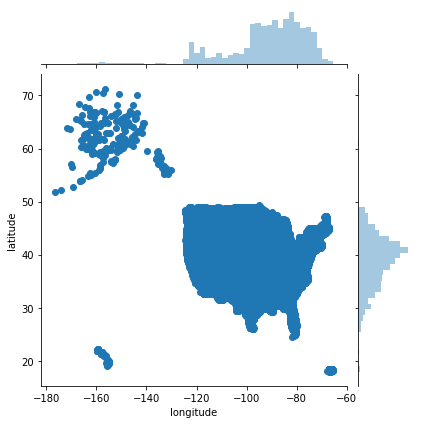

In [6]:
sns.jointplot(zip_codes["longitude"], zip_codes["latitude"], kind="scatter")

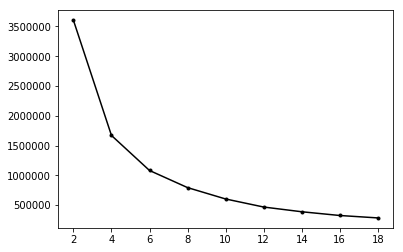

In [7]:
features = zip_codes[["longitude", "latitude"]].values

inertias = []
ks = list(range(2,20,2))

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)
    
plt.plot(ks, inertias, "k.-")

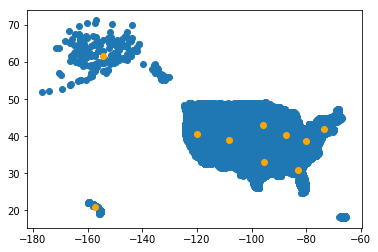

In [8]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(features)

plt.scatter(zip_codes["longitude"], zip_codes["latitude"])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="orange")

## Conclusion

The above plot shows that 10 clusters can be plotted to summarize the general population locations in the US based on zip codes. This makes sense because there are 10 'first' digits for zip codes in the range used which separate the US into roughly 10 equal population locations. We have a majority of the clusters on the east coast, with 1 in california. The rest of the west has only 1 which makes sense because these are some of the smallest states in population. Other dots are near chicago, pittsburgh, and atlanta, which are some of the other largest clusters of populations (and thus zip codes) in the US.